<a href="https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset"><center><img style="height: 70%;" src="https://www.pcimag.com/ext/resources/PCI/2019/May/cyient/pci0519-Cyient-904060684-900.jpg?1557154608" /></center></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("maintenance.csv")
df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
df.iloc[:, 0] = labelencoder_X_1.fit_transform(df.iloc[:, 0])
#df = pd.get_dummies(df, columns=["Type"], drop_first=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


<AxesSubplot:>

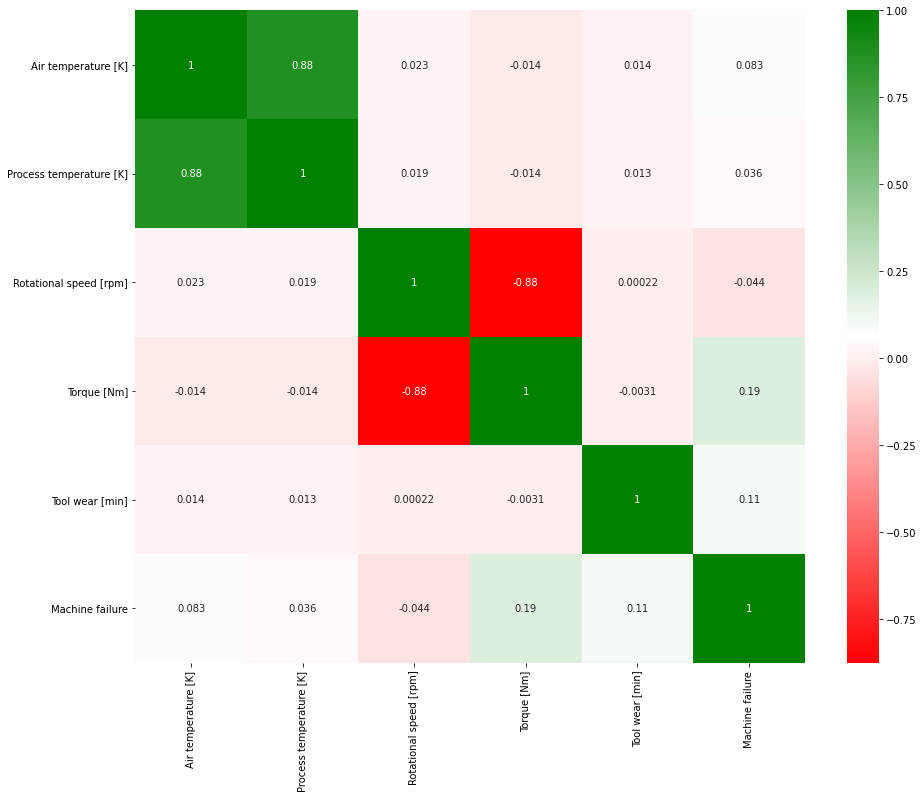

In [37]:
from matplotlib.colors import LinearSegmentedColormap

corr = df.iloc[:, 1:7].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

It appears that Air and process temperatures are collinerar. Also Rotational speed and Torque.
Since torque is a good indicator of failure, it's possible that only keeping this column or only
keeping Torque and Air temperature will improve predictive models.

In [38]:
df2 = df.drop(['Process temperature [K]', 'Rotational speed [rpm]'], axis=1)

<AxesSubplot:>

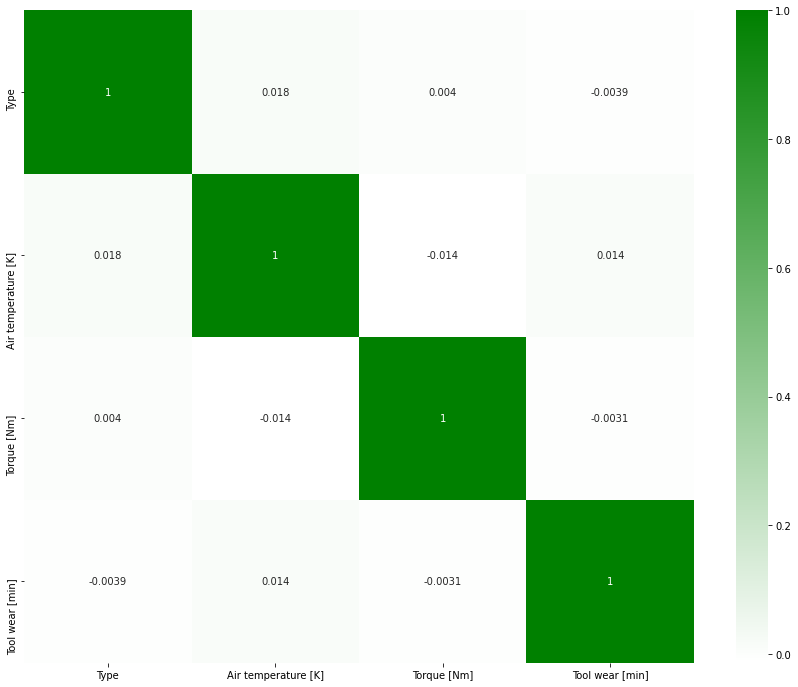

In [39]:
corr = df2.iloc[:, 0:4].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

In [40]:
df2

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,42.8,0,0
1,1,298.2,46.3,3,0
2,1,298.1,49.4,5,0
3,1,298.2,39.5,7,0
4,1,298.2,40.0,9,0
...,...,...,...,...,...
9995,2,298.8,29.5,14,0
9996,0,298.9,31.8,17,0
9997,2,299.0,33.4,22,0
9998,0,299.0,48.5,25,0


In [41]:
# Using df2 here gave a less accurate prediction.
y = df['Machine failure'].values
X = df.drop(['Machine failure'], axis=1).values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(len(df.loc[df['Machine failure']==1,]))
y_test.sum()

339


68

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [44]:
y_predict_test = clf.predict(X_test)

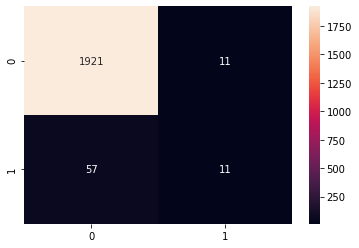

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1932
           1       0.50      0.16      0.24        68

    accuracy                           0.97      2000
   macro avg       0.74      0.58      0.61      2000
weighted avg       0.96      0.97      0.96      2000



In [45]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))

In [46]:
# Using df2 here gave a less accurate prediction.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)

In [47]:
y_predict_test = clf.predict(X_test)

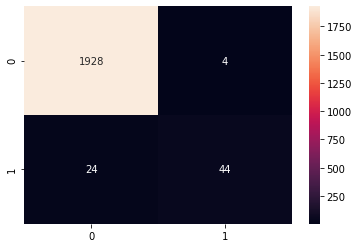

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.92      0.65      0.76        68

    accuracy                           0.99      2000
   macro avg       0.95      0.82      0.88      2000
weighted avg       0.99      0.99      0.98      2000



In [48]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))

In [49]:
from tensorflow.python.client import device_lib
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15669366317013021373
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5593628672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16069033228832198087
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:26:00.0, compute capability: 6.1"
]
Num GPUs Available:  1


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.32837235, -0.45804248,  0.19562607, -0.7105189 ,  0.19997836,
        -0.52524764],
       [-0.32837235,  0.24219445,  1.0743507 , -0.50619614,  0.53163827,
         1.51086151],
       [-0.32837235,  0.19217752, -0.07475074, -0.90916602,  0.34068257,
        -0.52524764],
       ...,
       [-1.99101716, -0.15794094, -0.54791015, -0.45511546,  0.04922386,
         1.16628919],
       [-0.32837235,  0.39224522,  0.60119128, -0.44943982,  0.76279518,
        -0.39994861],
       [ 1.33427246,  1.39258368,  1.54751011, -0.68214074,  0.26028017,
         2.0903695 ]])

In [51]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
from keras import optimizers
from keras import Model
from keras.layers import Input, Dense
from keras.models import load_model
tf.debugging.set_log_device_placement(False)
try:
    model = load_model('./model.h5')

#sess = tf.compat.v1.Session()
#K.set_session(sess)

except:
    layer1 = Input(X_train.shape[1])
    layer2 = Dense(6, activation='relu')(layer1)
    layer3 = Dense(4, activation='relu')(layer2)
    layer4 = Dense(4, activation='relu')(layer3)
    output = Dense(1, activation='sigmoid')(layer4)

    model = Model(inputs=layer1, outputs=output)
    model.summary()


    opt = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')


    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    model.fit(X_train_scaled, y_train, batch_size=10, epochs=200)
    model.save('./model.h5')
    dot_img_file = './model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

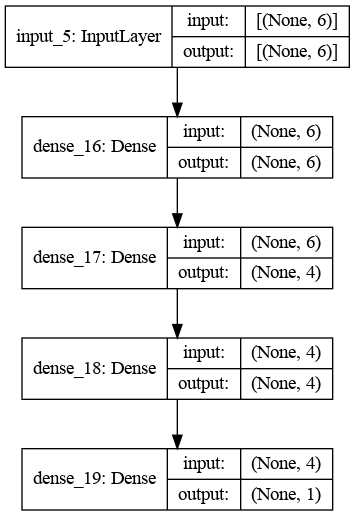

In [52]:
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [53]:
#y_predict_test = model.predict_classes(X_test)
y_predict_test = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(y_predict_test.sum())
print(y_test.sum())

66
68


In [54]:
for i in range(2000):
    if(y_predict_test[i] or y_test[i]):
        print('%s => %d (expected %d)' % (X_test[i].tolist(), y_predict_test[i], y_test[i]))

[1.0, 302.0, 310.5, 1263.0, 60.6, 90.0] => 1 (expected 1)
[1.0, 300.8, 310.1, 1405.0, 61.2, 189.0] => 1 (expected 1)
[1.0, 295.6, 306.1, 1372.0, 55.6, 215.0] => 1 (expected 1)
[1.0, 300.5, 309.7, 1395.0, 61.0, 157.0] => 1 (expected 0)
[1.0, 302.1, 310.7, 1359.0, 49.3, 41.0] => 1 (expected 1)
[1.0, 300.6, 310.3, 1648.0, 30.5, 217.0] => 0 (expected 1)
[1.0, 298.4, 308.3, 1433.0, 62.3, 20.0] => 1 (expected 1)
[2.0, 300.4, 310.2, 1671.0, 30.5, 234.0] => 0 (expected 1)
[1.0, 302.0, 311.2, 1270.0, 65.3, 182.0] => 1 (expected 1)
[1.0, 299.1, 309.8, 1398.0, 55.4, 217.0] => 1 (expected 1)
[1.0, 303.2, 311.4, 1238.0, 54.6, 226.0] => 1 (expected 1)
[2.0, 301.6, 310.8, 1290.0, 65.3, 63.0] => 1 (expected 0)
[1.0, 300.6, 309.4, 2496.0, 13.5, 111.0] => 1 (expected 0)
[2.0, 303.4, 311.8, 1391.0, 42.7, 197.0] => 1 (expected 0)
[1.0, 297.8, 308.9, 1871.0, 25.6, 200.0] => 0 (expected 1)
[1.0, 303.5, 311.9, 1344.0, 49.3, 93.0] => 1 (expected 1)
[1.0, 303.3, 311.6, 1301.0, 45.1, 219.0] => 1 (expected 1)
[1

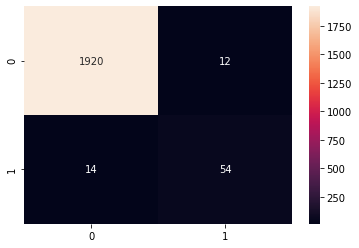

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.82      0.79      0.81        68

    accuracy                           0.99      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.99      0.99      0.99      2000



In [55]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))